In [5]:
import random
import pandas as pd
import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [3]:
from src import config as C

In [9]:
KEYPOINT_COLOR = (0, 0, 255)

def vis_keypoints(image, keypoints, color=KEYPOINT_COLOR, diameter=3):
    image = image.copy()

    for (x, y) in keypoints:
        cv2.circle(image, (int(x), int(y)), diameter, (0, 255, 0), -1)
        
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)

In [10]:
image = cv2.imread(C.IMAGE_LIST[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

keypoints = pd.read_csv(C.LABEL_LIST[0]).values.tolist()

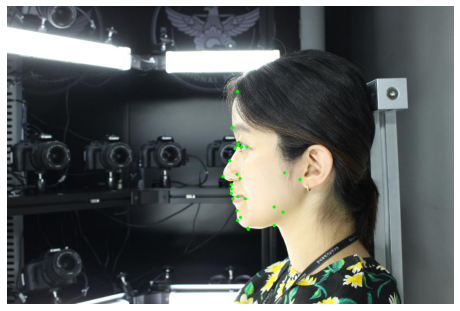

In [11]:
vis_keypoints(image, keypoints)

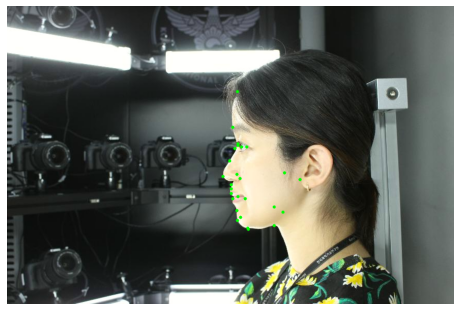

In [21]:
# random.seed(7)
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.OneOf([
            A.HueSaturationValue(p=0.5), 
            A.RGBShift(p=0.7)
        ], p=1),                          
        A.RandomBrightnessContrast(p=0.5)
    ], 
    keypoint_params=A.KeypointParams(format='xy'),
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])